/usr/local/lib64/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib64/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


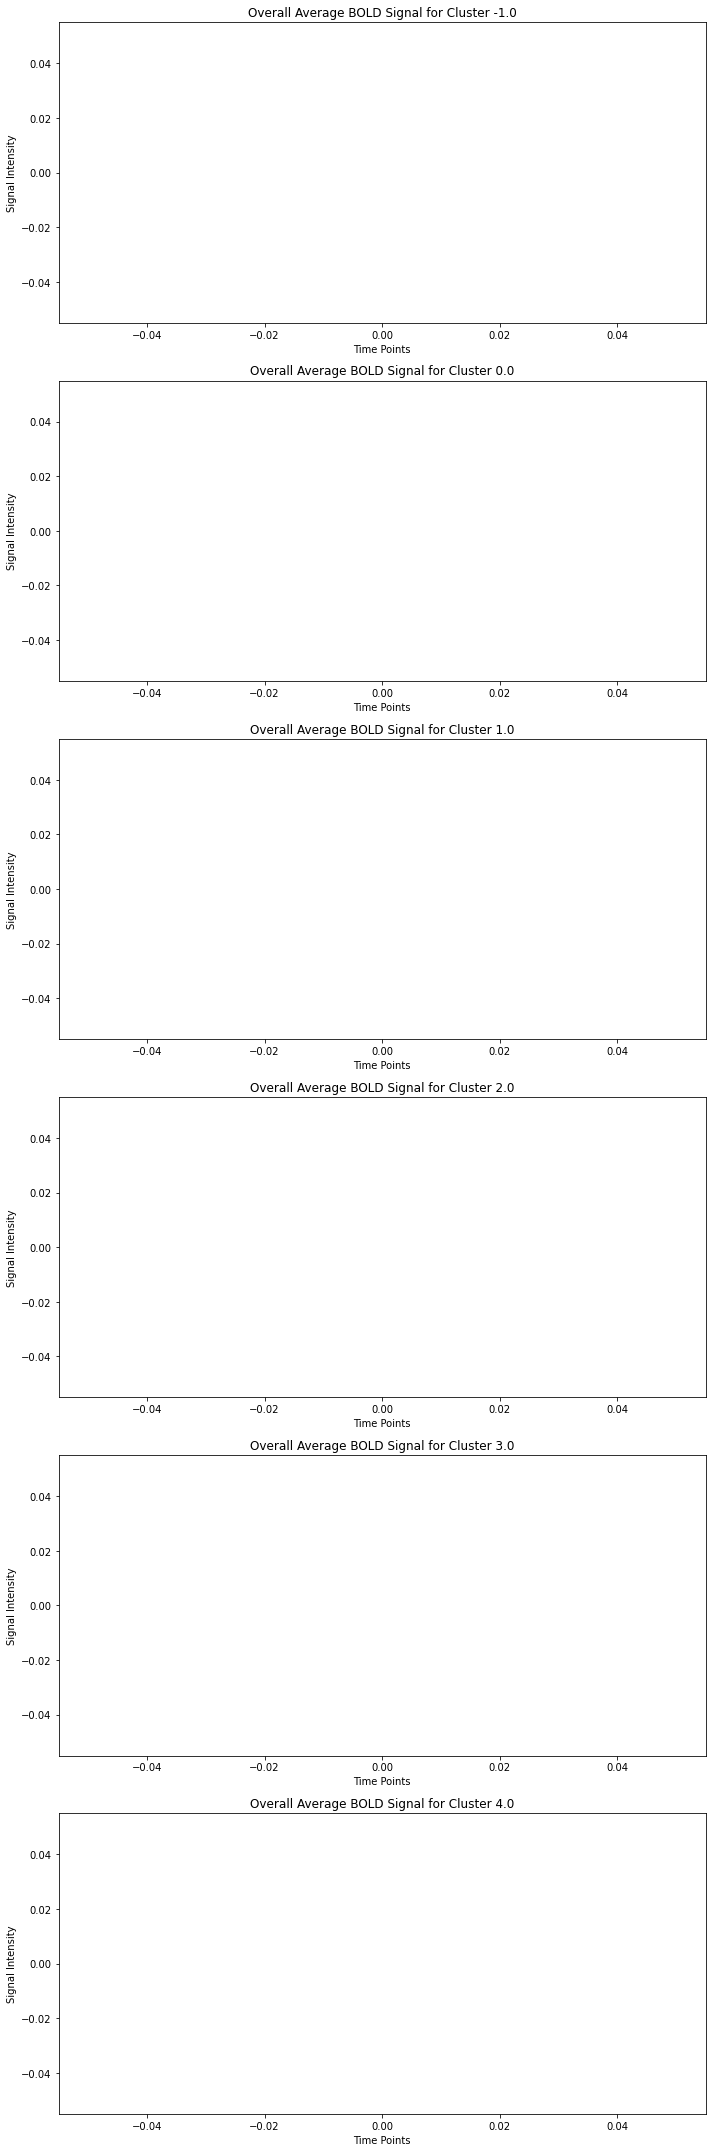

In [4]:
import os
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import glob

In [ ]:
# Specify the directory and the specific string to look for in filenames
directory_path = "/home/fgomezacebo/scratch"
specific_string = "ses-high_filtered_func_data_selected.nii.gz"

# Load cluster map
cluster_map_nifti = nib.load('consensus_cluster_map.nii')
cluster_map = cluster_map_nifti.get_fdata()

# Identify unique clusters
unique_clusters = np.unique(cluster_map)

# Iterate over files and process BOLD signals for each cluster
file_paths = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if specific_string in f]
average_signals = {cluster: [] for cluster in unique_clusters}

for file_path in file_paths:
    fmri_nifti = nib.load(file_path)
    fmri_data = fmri_nifti.get_fdata()
    
    for cluster in unique_clusters:
        mask = cluster_map == cluster
        cluster_bold_signals = fmri_data[mask]

        # Calculate average signal for this file
        average_bold_signal = np.mean(cluster_bold_signals, axis=0)
        average_signals[cluster].append(average_bold_signal)

# Plot average BOLD signal for each cluster across all files
for cluster in unique_clusters:
    overall_average = np.mean(average_signals[cluster], axis=0)
    
    plt.figure()
    plt.plot(overall_average)
    plt.title(f'Overall Average BOLD Signal for Cluster {cluster}')
    plt.xlabel('Time Points')
    plt.ylabel('Signal Intensity')
    plt.show()

In [ ]:
# Load the mask file (adjust the path as necessary)
mask_nifti = nib.load('/home/fgomezacebo/scratch/MNI152lin_T1_2mm_brain_pve_GM.nii.gz')
mask = mask_nifti.get_fdata() > 0.3  # Convert to a boolean mask
base_dir= "/home/fgomezacebo/scratch"
condition = 'high'


# Load the cluster map
cluster_map_nifti = nib.load('/home/fgomezacebo/scratch/consensus_cluster_map_TAQ_high.nii')
cluster_map = cluster_map_nifti.get_fdata()

# Identify unique clusters
unique_clusters = np.unique(cluster_map)

# Initialize a dictionary to store sum of time series for each cluster
sum_time_series = {cluster: None for cluster in unique_clusters}
# Identify unique clusters
plt.figure(figsize=(10, 6))
patient_cluster_maps = []
specific_string = "ses-high_filtered_func_data_normalized.nii.gz"
paths = [os.path.join(base_dir, f) for f in os.listdir(base_dir) if specific_string in f]

for file_path in paths:
    # Load the NIfTI file
    nifti_img = nib.load(file_path)
    data = nifti_img.get_fdata()

    # Process BOLD signals for each cluster
    for cluster in unique_clusters:
        mask = cluster_map == cluster
        cluster_bold_signals = data[mask]

        # Average the BOLD signal across all voxels in the cluster for each time point
        average_bold_signal = np.mean(cluster_bold_signals, axis=0)

        # Sum the average time series for each cluster
        if sum_time_series[cluster] is None:
            sum_time_series[cluster] = average_bold_signal
        else:
            sum_time_series[cluster] += average_bold_signal

# Calculate the overall average time series for each cluster
average_time_series = {cluster: sum_series / len(paths) for cluster, sum_series in sum_time_series.items()}

clusters = list(average_time_series.keys())
colors = plt.cm.jet(np.linspace(0, 1, len(clusters)))  # Choose a colormap

plt.figure(figsize=(10, 6))
for cluster, color in zip(clusters, colors):
    plt.plot(average_time_series[cluster], label=f'Cluster {cluster}', color=color)


plt.title('Average BOLD Signal Profiles by Cluster Across Files')
plt.xlabel('Time Points')
plt.ylabel('Signal Intensity')
plt.legend()
plt.grid(True)
plt.show()

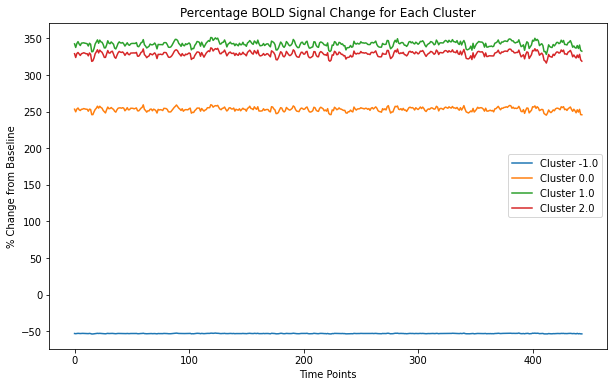

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib

# Define the baseline time points (adjust as needed)
baseline_timepoints = slice(0, 64)

# Load your single fMRI data
file_path = '/home/fgomezacebo/lood_storage/divi/Projects/fMRS/students/Fernando/Renamed_scans_conditions/sub-008/ses-low/func/sub-008_ses-low_filtered_func_data.nii.gz'  # Replace with your actual file path
fmri_nifti = nib.load(file_path)
fmri_data = fmri_nifti.get_fdata()
# Load the cluster map
cluster_map_nifti = nib.load('/home/fgomezacebo/scratch/consensus_cluster_map_TAQ_high.nii')
cluster_map = cluster_map_nifti.get_fdata()

# Identify unique clusters
unique_clusters = np.unique(cluster_map)

# Initialize a dictionary to store the percentage change for each cluster
percent_changes = {cluster: None for cluster in unique_clusters}

common_baseline = np.mean(fmri_data[..., baseline_timepoints], axis=(0, 1, 2, 3))

# Process BOLD signals for each cluster using the common baseline
for cluster in unique_clusters:
    mask = cluster_map == cluster
    cluster_bold_signals = fmri_data[mask]

    # Calculate percentage change from the common baseline
    percent_change = ((cluster_bold_signals - common_baseline) / common_baseline) * 100
    average_percent_change = np.mean(percent_change, axis=0)
    percent_changes[cluster] = average_percent_change


# Plotting
plt.figure(figsize=(10, 6))
for cluster, percent_change_series in percent_changes.items():
    plt.plot(percent_change_series, label=f'Cluster {cluster}')

plt.title('Percentage BOLD Signal Change for Each Cluster')
plt.xlabel('Time Points')
plt.ylabel('% Change from Baseline')
plt.legend()
plt.show()

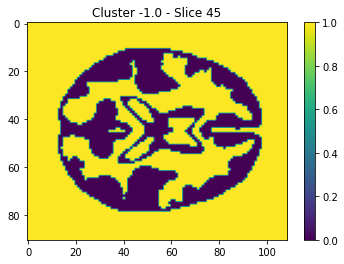

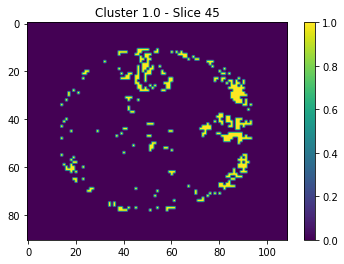

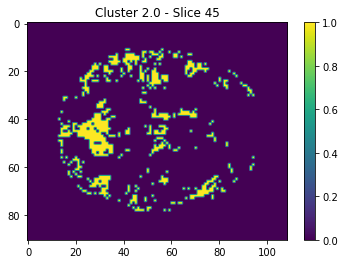

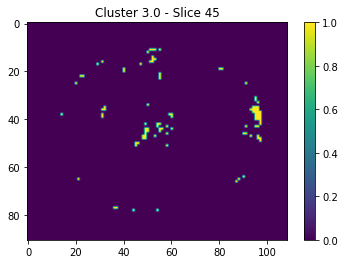

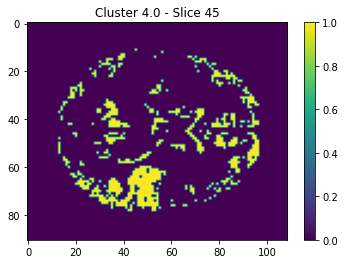

In [7]:
# Load cluster map
cluster_map_nifti = nib.load('/home/fgomezacebo/scratch/consensus_cluster_map_TAQ_high.nii')
cluster_map = cluster_map_nifti.get_fdata()

# Identify unique clusters
unique_clusters = np.unique(cluster_map)

# Function to display a slice of the cluster map
def display_cluster_slice(cluster_map, cluster_id, slice_index):
    # Create a mask for the specific cluster
    mask = cluster_map == cluster_id

    # Display the specified slice
    plt.figure()
    plt.imshow(mask[:, :, slice_index], cmap='viridis')
    plt.title(f'Cluster {cluster_id} - Slice {slice_index}')
    plt.colorbar()
    plt.show()

# Choose a slice index to display
slice_index = 45  # Modify as needed

# Display slices for each cluster
for cluster in unique_clusters:
    if cluster != 0:  # Assuming 0 is background or non-cluster
        display_cluster_slice(cluster_map, cluster, slice_index)


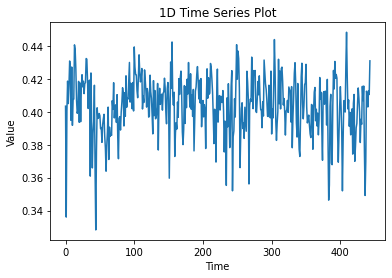

In [2]:
file_path = 'cluster_1_time_series.txt'

data = []

# Reading the data from the file
with open(file_path, 'r') as file:
    for line in file:
        try:
            # Convert the line to a floating-point number
            value = float(line.strip())
            data.append(value)
        except ValueError:
            # If conversion fails, print the problematic line and skip it
            print(f"Skipping invalid line: {line.strip()}")

# Creating the plot
plt.plot(data)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('1D Time Series Plot')
plt.show()
